In [58]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 

In [32]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('https://raw.githubusercontent.com/patilkundan/datasets/main/retail_store_data.csv')

In [33]:
data=data[["Purchase rate","Credit Score","Frequency of Visits","Eligibility"]]

In [34]:
# Encode the 'Eligibility' column
le = LabelEncoder()
data['Eligibility'] = le.fit_transform(data['Eligibility'])

In [35]:
# Split the data into features (X) and the target variable (y)
X = data.drop('Eligibility', axis=1)
y = data['Eligibility']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the models
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
gbdt_model = GradientBoostingClassifier()
lg_model=LogisticRegression()

In [62]:
models = [svm_model, knn_model, dt_model, gbdt_model,lg]
model_names = ['SVM', 'KNN', 'Decision Tree', 'Gradient Boosted DT','lg']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}\nClassification Report:\n{report}\n")

Model: SVM
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       125
           1       0.77      1.00      0.87       115

    accuracy                           0.85       240
   macro avg       0.88      0.86      0.85       240
weighted avg       0.89      0.85      0.85       240


Model: KNN
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       125
           1       0.82      0.98      0.89       115

    accuracy                           0.89       240
   macro avg       0.90      0.89      0.89       240
weighted avg       0.90      0.89      0.89       240


Model: Decision Tree
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       125
           1       0.84      0.84      0.84       115

    accuracy           

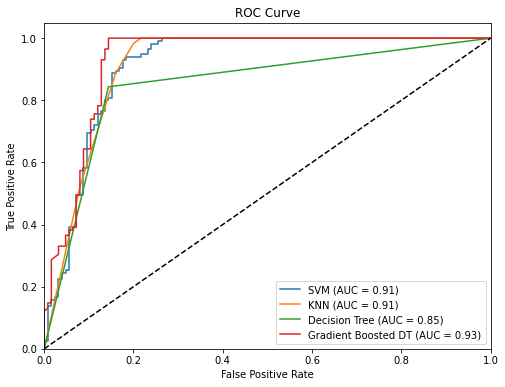

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have trained your models (svm_model, knn_model, dt_model, gbdt_model)
# Replace 'svm_model', 'knn_model', etc., with your trained models

# For SVM and GBDT, you can use decision_function
svm_scores = svm_model.decision_function(X_test)
gbdt_scores = gbdt_model.decision_function(X_test)

# For KNN and Decision Tree, you can use predicted probabilities for the positive class
knn_probs = knn_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_gbdt, tpr_gbdt, _ = roc_curve(y_test, gbdt_scores)
roc_auc_gbdt = auc(fpr_gbdt, tpr_gbdt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_gbdt, tpr_gbdt, label='Gradient Boosted DT (AUC = %0.2f)' % roc_auc_gbdt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [77]:
lg.predict([[51,10,10,]])

array([0])

In [78]:
import joblib

# Assuming you have already trained and fitted 

# Save the logistics model to a file
joblib.dump(lg, 'model.pkl')

['model.pkl']

In [79]:
# Later, when you want to make predictions with the saved model:
loaded_model = joblib.load('model.pkl')

In [81]:
loaded_model.predict([[51,10,10,]])

array([0])

In [83]:
data.describe()

,Purchase rate,Credit Score,Frequency of Visits,Eligibility
count,800.000000,800.000000,800.000000,800.000000
mean,62.770000,653.702500,64.337500,0.500000
std,26.086639,142.403195,25.653728,0.500313
min,1.000000,302.000000,1.000000,0.000000
25%,49.750000,596.500000,52.000000,0.000000
50%,67.000000,687.500000,69.000000,0.500000
75%,84.000000,763.000000,85.000000,1.000000
max,100.000000,850.000000,100.000000,1.000000
